# INFO 3401 – Module Assignment 4

[Brian C. Keegan, Ph.D.](http://brianckeegan.com/)  
[Assistant Professor, Department of Information Science](https://www.colorado.edu/cmci/people/information-science/brian-c-keegan)  
University of Colorado Boulder  

Copyright and distributed under an [MIT License](https://opensource.org/licenses/MIT).

## Learning Objectives
This is the sole component for Module Assignment 4: there are no sub-assignments. This assignment is due Wednesday, October 28 by 11:59pm on Canvas. Please submit as an HTML file: File > Download as > HTML (.html).


In [33]:
# Our usual libraries for working with data
import pandas as pd
import numpy as np

pd.options.display.max_columns = 100
# pd.options.display.max_rows = 100

# Our usual libraries for visualizing data
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sb


# Spatial libaries
import geopandas as gpd
import geoplot, contextily

## Read in data

### Sales data
Read in the "colorado_monthly_cannabis_sales.csv" file as `sales_df`.

In [124]:
sales_df = pd.read_csv('colorado_monthly_cannabis_sales.csv')

Print out the number of rows and show the tail of `sales_df`.

In [20]:
sales_df.shape[0]


5398

In [75]:
sales_df.tail()

,Time,County,Sales,Type,date
5393,2020-08,Huerfano,506634.0,Recreational,2020-08-01
5394,2020-08,Jefferson,5805803.0,Recreational,2020-08-01
5395,2020-08,Lake,449116.0,Recreational,2020-08-01
5396,2020-08,Garfield,2538125.0,Recreational,2020-08-01
5397,2020-08,Bent,NaN,Recreational,2020-08-01


### Crime data

Read in the "co_county_crime.csv" file as `crime_df`.

In [23]:
crime_df = pd.read_csv("co_county_crime.csv")

Print out the number of rows and show the tail of `crime_df`.

In [25]:
crime_df.shape[0]

10668

In [24]:

crime_df.tail()

,Time,County,Type,Arrests
10663,2019-12,Washington,Narcotics,0.0
10664,2019-12,Weld,DUI,65.0
10665,2019-12,Weld,Narcotics,71.0
10666,2019-12,Yuma,DUI,0.0
10667,2019-12,Yuma,Narcotics,0.0


### County shapefile

Read in the "co_counties" shapefiles as `co_counties_gdf`.

In [68]:
co_counties_gdf = gpd.read_file('co_counties/co_counties.shp')
#make sure it is in downloads folder

Show the CRS.

In [47]:
co_counties_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Print out the number of rows and show the tail of `co_counties_gdf`.

In [67]:
co_counties_gdf.shape[0]


64

In [74]:
co_counties_gdf.tail()

,co_fips,county,househo_20,pop_2010,shape_st_1,shape_st_2,shape_star,shape_stle,geometry
59,101.0,Pueblo,63148.0,159063.0,6.206416e+09,334853.177401,0.0,0.0,"POLYGON ((-104.05410 38.52218, -104.05436 38.5..."
60,103.0,Rio Blanco,2626.0,6666.0,8.356260e+09,472176.056913,0.0,0.0,"POLYGON ((-107.80151 40.22250, -107.76365 40.2..."
61,121.0,Washington,1980.0,4814.0,6.535833e+09,351598.108603,0.0,0.0,"POLYGON ((-102.77997 40.43842, -102.78005 40.4..."
62,123.0,Weld,89849.0,252825.0,1.039621e+10,486242.951314,0.0,0.0,"MULTIPOLYGON (((-103.57413 40.99985, -103.5736..."
63,125.0,Yuma,3947.0,10043.0,6.137023e+09,321423.270613,0.0,0.0,"POLYGON ((-102.05155 40.43985, -102.05136 40.4..."


## Feature engineering

### Sales data
In `sales_df`, cast the values in the "Month" column from strings to `pd.Timestamp` or `pd.Period` objects using an appropriate pandas function.

In [125]:
sales_df['date'] = pd.to_datetime(sales_df['Time'])

In [126]:
sales_df['date']


0      2014-01-01
1      2014-01-01
2      2014-01-01
3      2014-01-01
4      2014-01-01
          ...    
5393   2020-08-01
5394   2020-08-01
5395   2020-08-01
5396   2020-08-01
5397   2020-08-01
Name: date, Length: 5398, dtype: datetime64[ns]

NaNs are present in the "Sales" column if there are 3 or fewer dispensaries in a county in a given month to protect their confidentiality: 

> "Per §39-21-113(4), C.R.S., data derived from taxpayer returns is aggregated in order to protect the confidentiality of individual taxpayers. It is the Department’s practice to release aggregated data only when there are at least three taxpayers in a given category and none of them represents more than 80% of the total.

This is a good case for keeping rather than dropping NaNs: because a county doesn't report sales doesn't mean that it's not a legal county with dispensaries and sales.

### Crime data

In `crime_df`, cast the values in the "Month" column from strings to `pd.Timestamp` or `pd.Period` objects using an appropriate pandas function.

In [56]:
crime_df['date'] = pd.to_datetime(crime_df['Time'])

### Counties data

Convert the "county" column in `co_counties_gdf` to title-case ([hint](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.title.html)) and show the head after the change.

In [69]:
co_counties_gdf['county'] = co_counties_gdf['county'].str.title()


In [70]:
co_counties_gdf['county'].head()

0        Adams
1      Alamosa
2     Arapahoe
3    Archuleta
4         Bent
Name: county, dtype: object

## Exploratory analysis

### Sales data
How many times does each county appear in `sales_df`?

In [127]:
sales_df['County'].value_counts().sort_index()

Adams          160
Alamosa         80
Arapahoe       151
Archuleta      129
Bent            11
Boulder        159
Chaffee        153
Clear Creek    155
Conejos         62
Costilla       116
Crowley         16
Delta           12
Denver         160
Eagle          156
El Paso        154
Fremont         80
Garfield       160
Gilpin         136
Grand          150
Gunnison       129
Huerfano        63
Jefferson      160
La Plata       152
Lake            80
Larimer        157
Las Animas     139
Mesa           148
Moffat         109
Montezuma      149
Montrose        95
Morgan         144
Otero           70
Ouray          135
Park           160
Pitkin         158
Pueblo         160
Routt          160
Saguache        84
San Juan        68
San Miguel     160
Sedgwick       153
Summit         160
Teller          45
Weld           160
Name: County, dtype: int64

Make a histogram of the "Sales" values in `sales_df`. This might be highly-skewed, so experiment with using log-scaled bins and x-axis: try passing `np.logspace(3,8,25)` to the "bins" parameter and set the xscale to "log" ([hint](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.axes.Axes.set_xscale.html)). Make sure to label your axes. Real extra credit if you can format the x-axis to have more interpretable ticks too ([hint](https://matplotlib.org/3.3.1/gallery/ticks_and_spines/tick-formatters.html)).

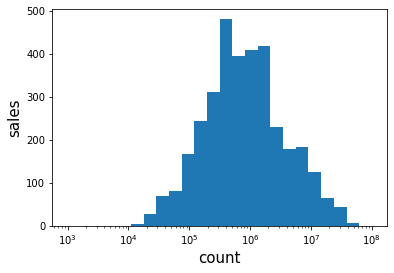

In [128]:
#sales_df.hist(column = 'Sales', bins = np.logspace(3,8,25), xscale = 'log')

sales_df['Sales'].hist(bins=np.logspace(3,8,25),grid=False)
plt.xlabel("count", fontsize=15)
plt.ylabel("sales",fontsize=15)
plt.xscale('log')

Interpret the histogram. What is the most common monthly sales value?

The most common monthly sales value is the 480 value.

Reshape the data with "Time" in the index and "Medical" and "Recreational" as columns and the total number of sales as values. Save the resulting reshape as `monthly_sales_pivot`. You can do this with a pivot table or a groupby-aggregation. Show the tail of this reshaped DataFrame.

In [129]:
monthly_sales_pivot = pd.pivot_table(sales_df, values=['Sales'], index=['Time'],
                    columns=["Type"], aggfunc= np.sum)

In [130]:


monthly_sales_pivot.tail()

Sales             
Type        Medical Recreational
Time                            
2020-04  34996438.0  108687035.0
2020-05  41458783.0  144280917.0
2020-06  39628326.0  152754961.0
2020-07  41985544.0  176676875.0
2020-08  40904451.0  169071513.0

Make a lineplot of total medical and recreational cannabis sales by month using the DataFrame above. Label your axes and title. Real extra credit if you can format the y-axis to have more interpretable ticks too ([hint](https://matplotlib.org/3.1.0/gallery/ticks_and_spines/custom_ticker1.html)).

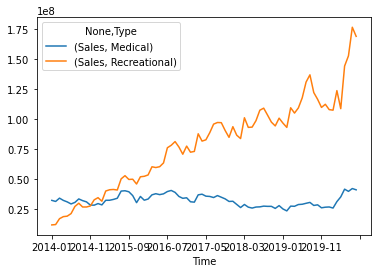

In [131]:
lines = monthly_sales_pivot.plot.line()

Pick a county in Colorado and filter original sales DataFrame to only that county's values. Note that not all counties permit medical and/or recreational sales and thus may not be present in the data or they have changed their policies over time creating gaps. Make sure to pick a county with recreational sales. Reshape the data to include recreational and medical like we did above. Save the result as `county_monthly_sales_pivot`. Show the tail of this data.

In [132]:
sales_df.filter(like='Boulder')



county_monthly_sales_pivot = pd.pivot_table(sales_df, values=['Sales'], index=['Time'],
                    columns=["Type"])

county_monthly_sales_pivot.tail()

Sales              
Type          Medical  Recreational
Time                               
2020-04  2.916370e+06  3.293547e+06
2020-05  3.454899e+06  4.372149e+06
2020-06  3.048333e+06  4.628938e+06
2020-07  3.498795e+06  5.196379e+06
2020-08  3.146496e+06  5.283485e+06

Visualize the county-level data over time as a line plot like we did above.

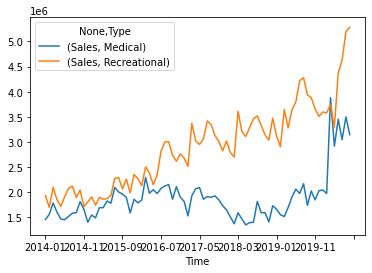

In [133]:
lines2 = county_monthly_sales_pivot.plot.line()

### Crime data

How many times does each county appear in `crime_df`?

In [134]:
crime_df['County'].value_counts().sort_index()

Adams         168
Alamosa       168
Arapahoe      168
Archuleta     168
Baca          168
             ... 
Summit        168
Teller        168
Washington    168
Weld          168
Yuma          168
Name: County, Length: 65, dtype: int64

Reshape the data with "Time" in the index and "DUI" and "Narcotics" as columns and the total number of arrests as values. You can do this with a pivot table or a groupby-aggregation. Save the result as `monthly_crime_pivot` and show the tail.

In [135]:



monthly_crime_pivot = pd.pivot_table(crime_df, values=['Arrests'], index=['Time'],
                    columns=["Type"])

monthly_crime_pivot.tail()

Arrests           
Type           DUI  Narcotics
Time                         
2019-08  29.234375  23.412698
2019-09  26.296875  23.000000
2019-10  24.703125  22.396825
2019-11  27.531250  20.365079
2019-12  26.843750  18.809524

Make a lineplot of total DUI and Narcotics arrests by month using `monthly_crime_pivot`. Label your axes and title.

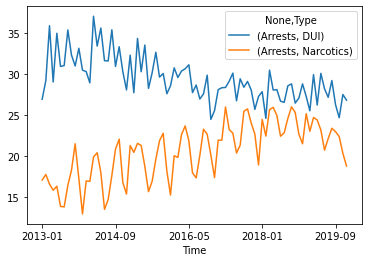

In [136]:
lines3 = monthly_crime_pivot.plot.line()

Pick a county in Colorado and filter the crime DataFrame to only that county's values. Reshape the data to include DUIs and Narcotics like we did above. Save as `county_monthly_crime_pivot`. Show the tail of this data.

In [121]:

crime_df.filter(like='Boulder')



county_monthly_crime_pivot = pd.pivot_table(crime_df, values=['Arrests'], index=['Time'],
                    columns=["Type"])

county_monthly_crime_pivot.tail()

Arrests           
Type           DUI  Narcotics
Time                         
2019-08  29.234375  23.412698
2019-09  26.296875  23.000000
2019-10  24.703125  22.396825
2019-11  27.531250  20.365079
2019-12  26.843750  18.809524

Visualize the county-level data over time as a line plot like we did above.

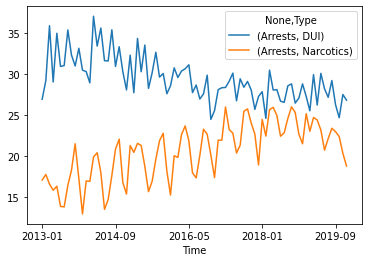

In [119]:
lines4 = county_monthly_crime_pivot.plot.line()

### Combine both state-level datasets

Use `pd.merge` to combine the reshaped state-level DataFrames using an "inner" join called `combined_df` and inspect.

In [143]:

combined_df= pd.merge(monthly_sales_pivot, monthly_crime_pivot, left_index=True, right_index=True)

combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72 entries, 2014-01 to 2019-12
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   (Sales, Medical)       72 non-null     float64
 1   (Sales, Recreational)  72 non-null     float64
 2   (Arrests, DUI)         72 non-null     float64
 3   (Arrests, Narcotics)   72 non-null     float64
dtypes: float64(4)
memory usage: 2.8+ KB


In [144]:
combined_df

Sales                 Arrests           
Type        Medical Recreational        DUI  Narcotics
Time                                                  
2014-01  32105349.0   11606429.0  30.328125  16.984127
2014-02  31203950.0   11905758.0  28.953125  16.936508
2014-03  33964665.0   16799118.0  37.078125  19.904762
2014-04  32079528.0   18520452.0  33.437500  20.428571
2014-05  30832970.0   18920521.0  35.640625  18.031746
...             ...          ...        ...        ...
2019-08  30401777.0  136935124.0  29.234375  23.412698
2019-09  27866924.0  122125039.0  26.296875  23.000000
2019-10  28379523.0  116469574.0  24.703125  22.396825
2019-11  25897253.0  109727058.0  27.531250  20.365079
2019-12  26408203.0  112343120.0  26.843750  18.809524

[72 rows x 4 columns]

Create a new normalized DataFrame called `normalized_df` by [dividing](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.divide.html) by the January 2014 values in each column.

In [342]:
normalized_df =  combined_df.div(combined_df.iloc[0])

Inspect the head of `normalized_df` to confirm the January 1, 2014 values are 1.

In [343]:
normalized_df.head()

Sales                Arrests          
Type      Medical Recreational       DUI Narcotics
Time                                              
2014-01  1.000000     1.000000  1.000000  1.000000
2014-02  0.971924     1.025790  0.954663  0.997196
2014-03  1.057913     1.447398  1.222566  1.171963
2014-04  0.999196     1.595706  1.102524  1.202804
2014-05  0.960369     1.630176  1.175167  1.061682

Using `normalized_df`, make a line plot with the normalized DUI and Recreational values.

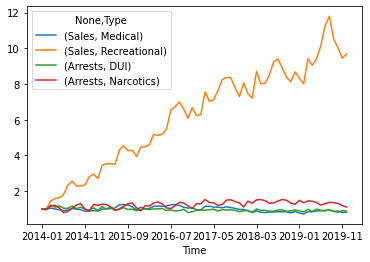

In [150]:
lines5 = normalized_df.plot.line()

Is this a helpful visualization? Why or why not?

This is very helpful as it shows that the sales of recreational marihuana increased even as everything else stayed roughly the same.

Compute the [correlation coefficients](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html) between the columns in `normalized_df`. (The values are symmetrical around the diagonal.) Pick two different values and interpret them.

In [329]:
p = normalized_df.corr(method='pearson')
p

Sales                Arrests          
Type                   Medical Recreational       DUI Narcotics
        Type                                                   
Sales   Medical       1.000000    -0.313120  0.276697 -0.208629
        Recreational -0.313120     1.000000 -0.628621  0.629456
Arrests DUI           0.276697    -0.628621  1.000000 -0.240662
        Narcotics    -0.208629     0.629456 -0.240662  1.000000

The value of -0.628621 for DUI and Recreational means that there is a moderate negative correlation between the rise of Recreational marijuana sales and the prevalence of DUI arrests. The vale of 0.629456 for Narcotics and Recreational indicates that their is a moderate positive correlation between recreational marijuana sales and narcotics arrests. This means that rising sales of recreational marijuana has contributed (or is associated with rather) a rise is arrests for people in possesion of narcotics but a decrease in DUI (drunk driving) arrests.

Using `normalized_df`, make a scatter plot with "Recreational" on the x-axis and "DUI" on the y-axis.

<AxesSubplot:xlabel='Recreational', ylabel='DUI'>

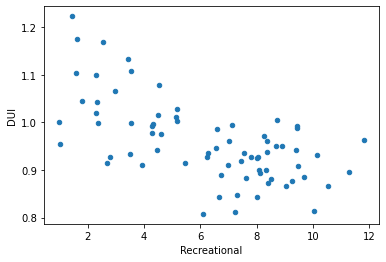

In [347]:


#normalized_df.columns = normalized_df.columns.droplevel()


normalized_df.plot(kind='scatter',x='Recreational',y='DUI')

Interpret the plot.

Negative correlation between DUI arrests and recreational sales.

Using `normalized_df`, make a scatter plot data with "Recreational" on the x-axis and "Narcotics" on the y-axis.

<AxesSubplot:xlabel='Recreational', ylabel='Narcotics'>

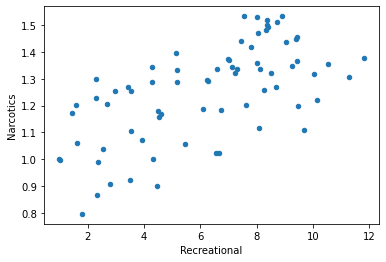

In [348]:
normalized_df.plot.scatter(x="Recreational" ,y="Narcotics")

Interpet this plot.

Positive correlation between recreational sales and narcotics arrests.

## Spatial visualization

### Sales data
Merge the county GeoDataFrame (left) with the original sales data (right) with a left join on the county names to a GeoDataFrame called `sales_gdf`. Check to make sure the merged object is a GeoDataFrame, print the shape, and inspect the head.

In [221]:

sales_gdf= pd.merge(left=co_counties_gdf, right=sales_df,  how = 'left', left_on='county', right_on='County')
sales_gdf.shape



(5418, 14)

In [222]:
sales_gdf.head()

,co_fips,county,househo_20,pop_2010,shape_st_1,shape_st_2,shape_star,shape_stle,geometry,Time,County,Sales,Type,date
0,1.0,Adams,154502.0,441603.0,3.064413e+09,392729.110497,0.0,0.0,"POLYGON ((-103.70574 39.99991, -103.70569 39.9...",2014-01,Adams,683098.0,Medical,2014-01-01
1,1.0,Adams,154502.0,441603.0,3.064413e+09,392729.110497,0.0,0.0,"POLYGON ((-103.70574 39.99991, -103.70569 39.9...",2014-01,Adams,NaN,Recreational,2014-01-01
2,1.0,Adams,154502.0,441603.0,3.064413e+09,392729.110497,0.0,0.0,"POLYGON ((-103.70574 39.99991, -103.70569 39.9...",2014-02,Adams,NaN,Recreational,2014-02-01
3,1.0,Adams,154502.0,441603.0,3.064413e+09,392729.110497,0.0,0.0,"POLYGON ((-103.70574 39.99991, -103.70569 39.9...",2014-02,Adams,454940.0,Medical,2014-02-01
4,1.0,Adams,154502.0,441603.0,3.064413e+09,392729.110497,0.0,0.0,"POLYGON ((-103.70574 39.99991, -103.70569 39.9...",2014-03,Adams,NaN,Recreational,2014-03-01


Filter the data to "Recreational" sales in December 2014. Visualize the "Sales" as a choropleth. Bonus points for using a basemap. Extra bonus points for using a [lognorm colormap](https://matplotlib.org/3.1.0/gallery/userdemo/colormap_normalizations_lognorm.html).

In [201]:
sales_gdf1 = sales_gdf[sales_gdf['Time']=='2014-12']
sales_gdf1 = sales_gdf1[sales_gdf1['Type']=='Recreational']

<AxesSubplot:>

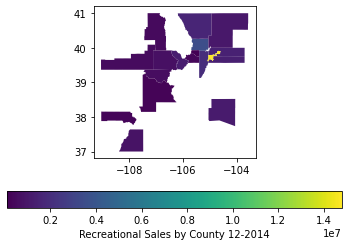

In [323]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)



sales_gdf1.plot(column='Sales', ax=ax, legend='true', legend_kwds={'label': "Recreational Sales by County 12-2014",'orientation': "horizontal"})



Filter the data to "Recreational" sales in December 2019. Visualize the "Sales" as a choropleth. Bonus points for using a basemap. Extra bonus points for using a [lognorm colormap](https://matplotlib.org/3.1.0/gallery/userdemo/colormap_normalizations_lognorm.html).

<AxesSubplot:>

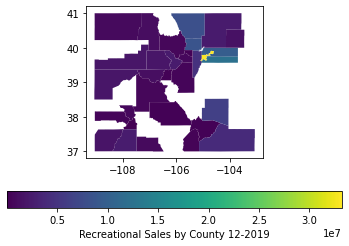

In [216]:
sales_gdf2 = sales_gdf[sales_gdf['Time']=='2019-12']
sales_gdf2 = sales_gdf2[sales_gdf2['Type']=='Recreational']

sales_gdf2

fig, ax = plt.subplots(1, 1)



sales_gdf2.plot(column='Sales', ax=ax, legend='true', legend_kwds={'label': "Recreational Sales by County 12-2019",'orientation': "horizontal"})



Interpet some changes you observe between the two maps.

Recreational sales increased in many different(most) counties.

### Crime data

Merge `co_counties_gdf` (left) with `crime_df` (right) into a GeoDataFrame called `crime_gdf`. Check to make sure the merged object is a GeoDataFrame, print the shape, and inspect the head.

In [218]:
crime_gdf= pd.merge(left=co_counties_gdf, right=crime_df,  how = 'left', left_on='county', right_on='County')
crime_gdf.head()

,co_fips,county,househo_20,pop_2010,shape_st_1,shape_st_2,shape_star,shape_stle,geometry,Time,County,Type,Arrests,date
0,1.0,Adams,154502.0,441603.0,3.064413e+09,392729.110497,0.0,0.0,"POLYGON ((-103.70574 39.99991, -103.70569 39.9...",2013-01,Adams,DUI,301.0,2013-01-01
1,1.0,Adams,154502.0,441603.0,3.064413e+09,392729.110497,0.0,0.0,"POLYGON ((-103.70574 39.99991, -103.70569 39.9...",2013-01,Adams,Narcotics,232.0,2013-01-01
2,1.0,Adams,154502.0,441603.0,3.064413e+09,392729.110497,0.0,0.0,"POLYGON ((-103.70574 39.99991, -103.70569 39.9...",2013-02,Adams,DUI,369.0,2013-02-01
3,1.0,Adams,154502.0,441603.0,3.064413e+09,392729.110497,0.0,0.0,"POLYGON ((-103.70574 39.99991, -103.70569 39.9...",2013-02,Adams,Narcotics,221.0,2013-02-01
4,1.0,Adams,154502.0,441603.0,3.064413e+09,392729.110497,0.0,0.0,"POLYGON ((-103.70574 39.99991, -103.70569 39.9...",2013-03,Adams,DUI,446.0,2013-03-01


In [219]:
crime_gdf.shape

(10417, 14)

Filter the data to "DUI" sales in December 2014. Visualize the "Arrests" as a choropleth. Bonus points for using a basemap. Extra bonus points for using a [lognorm](https://matplotlib.org/3.1.0/gallery/userdemo/colormap_normalizations_lognorm.html) or [symlognorm](https://matplotlib.org/3.3.1/gallery/userdemo/colormap_normalizations_symlognorm.html#sphx-glr-gallery-userdemo-colormap-normalizations-symlognorm-py).

<AxesSubplot:>

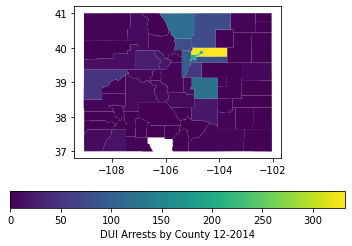

In [224]:
crime_gdf1 = crime_gdf[crime_gdf['Time']=='2014-12']
crime_gdf1 = crime_gdf1[crime_gdf1['Type']=='DUI']

fig, ax = plt.subplots(1, 1)



crime_gdf1.plot(column='Arrests', ax=ax, legend='true', legend_kwds={'label': "DUI Arrests by County 12-2014",'orientation': "horizontal"})


Filter the data to "DUI" sales in December 2019. Visualize the "Arrests" as a choropleth. Bonus points for using a basemap. Extra bonus points for using a [lognorm](https://matplotlib.org/3.1.0/gallery/userdemo/colormap_normalizations_lognorm.html) or [symlognorm](https://matplotlib.org/3.3.1/gallery/userdemo/colormap_normalizations_symlognorm.html#sphx-glr-gallery-userdemo-colormap-normalizations-symlognorm-py).

<AxesSubplot:>

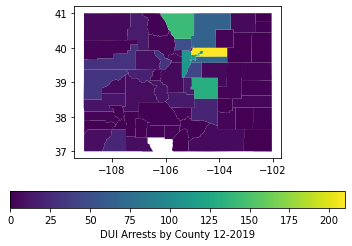

In [225]:
crime_gdf2 = crime_gdf[crime_gdf['Time']=='2019-12']
crime_gdf2 = crime_gdf2[crime_gdf2['Type']=='DUI']

fig, ax = plt.subplots(1, 1)



crime_gdf2.plot(column='Arrests', ax=ax, legend='true', legend_kwds={'label': "DUI Arrests by County 12-2019",'orientation': "horizontal"})


Interpet some changes you observe between the two maps.

Arests went down across the board between 2014 and 2019. 

### Changes in crime for legalizing vs. non-legalizing counties

From the December 2019 recreational GeoDataFrame you made, identify the unique counties that had reported recreational cannabis sales. Save this as `rec_counties_l`. Note that this is an inaccurate enumeration of counties with legalized cannabis salies 

In [290]:
rec_counties_l= sales_gdf2['County'].unique()
rec_counties_l.shape

(40,)

From the Colorado counties GeoDataFrame, identify all the unique counties in Colorado. Save this as `all_counties_l`.

In [299]:
all_counties_l = crime_df['County'].unique()
all_counties_l

array(['Adams', 'Alamosa', 'Arapahoe', 'Archuleta', 'Baca', 'Bent',
       'Boulder', 'Broomfield', 'Chaffee', 'Cheyenne', 'Clear Creek',
       'Colorado Bureau of Investigation', 'Colorado State Patrol',
       'Costilla', 'Crowley', 'Custer', 'Delta', 'Denver', 'Dolores',
       'Douglas', 'Eagle', 'El Paso', 'Elbert', 'Fremont', 'Garfield',
       'Gilpin', 'Grand', 'Gunnison', 'Hinsdale', 'Huerfano', 'Jackson',
       'Jefferson', 'Kiowa', 'Kit Carson', 'La Plata', 'Lake', 'Larimer',
       'Las Animas', 'Lincoln', 'Logan', 'Mesa', 'Mineral', 'Moffat',
       'Montezuma', 'Montrose', 'Morgan', 'Otero', 'Ouray', 'Park',
       'Phillips', 'Pitkin', 'Prowers', 'Pueblo', 'Rio Blanco',
       'Rio Grande', 'Routt', 'Saguache', 'San Juan', 'San Miguel',
       'Sedgwick', 'Summit', 'Teller', 'Washington', 'Weld', 'Yuma'],
      dtype=object)

Using the `rec_counties_l` and `co_counties_l`, do a set operation to identify all the counties with no reported recreational cannabis sales. Save this as `nonrec_counties_l`. 

In [306]:
nonrec_counties_1 = set(all_counties_l) - set(rec_counties_l)
nonrec_counties_1

{'Alamosa',
 'Baca',
 'Broomfield',
 'Cheyenne',
 'Colorado Bureau of Investigation',
 'Colorado State Patrol',
 'Custer',
 'Delta',
 'Dolores',
 'Douglas',
 'Elbert',
 'Fremont',
 'Hinsdale',
 'Jackson',
 'Kiowa',
 'Kit Carson',
 'Lincoln',
 'Logan',
 'Mineral',
 'Phillips',
 'Prowers',
 'Rio Blanco',
 'Rio Grande',
 'Teller',
 'Washington',
 'Yuma'}

The code below will compute the change in crime for 2019 versus 2013 for each county.

In [301]:
crime_pivot_df = pd.pivot_table(crime_df,index=['Time','County'],columns='Type',values='Arrests')
crime_2019 = crime_pivot_df.loc['2019-01-01':'2019-12-01'].sum(level=1)
crime_2013 = crime_pivot_df.loc['2013-01-01':'2013-12-01'].sum(level=1)
crime_change_df = crime_2019 - crime_2013
crime_change_df.reset_index(inplace=True)
crime_change_df.columns.name = None
crime_change_df.head()
crime_change_df.shape

(65, 3)

In [302]:
crime_change_df

,County,DUI,Narcotics
0,Adams,-1718.0,97.0
1,Alamosa,36.0,74.0
2,Arapahoe,-503.0,-167.0
3,Archuleta,-11.0,8.0
4,Baca,-16.0,-2.0
...,...,...,...
60,Summit,62.0,13.0
61,Teller,7.0,57.0
62,Washington,-11.0,1.0
63,Weld,6.0,258.0


In [310]:
yes = crime_df['County'].unique()
yes.shape

(65,)

Make a new column in `crime_change_df` called "Rec" that is a Boolean value of whether that county had any reported recreational sales.

In [311]:




crime_change_df['Rec'] = crime_df['County'].str.contains('Alamosa|Baca|Broomfield|Cheyenne|Colorado Bureau of Investigation|Colorado State Patrol|Custer|Delta|Dolores|Douglas|Elbert|Fremont|Hinsdale|Jackson|Kiowa|Kit Carson|Lincoln|Logan|Mineral|Phillips|Prowers|Rio Blanco|Rio Grande|Teller|Washington|Yuma', regex=True)
crime_change_df




,County,DUI,Narcotics,Rec
0,Adams,-1718.0,97.0,False
1,Alamosa,36.0,74.0,False
2,Arapahoe,-503.0,-167.0,True
3,Archuleta,-11.0,8.0,True
4,Baca,-16.0,-2.0,False
...,...,...,...,...
60,Summit,62.0,13.0,False
61,Teller,7.0,57.0,False
62,Washington,-11.0,1.0,True
63,Weld,6.0,258.0,True


Make a seaborn `barplot` with "Rec" on the x-axis and "DUI" on the y-axis.

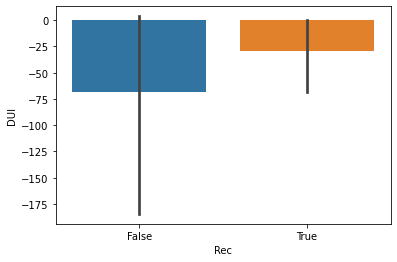

In [313]:
import seaborn as sns

ax = sns.barplot(x="Rec", y="DUI", data=crime_change_df)



Make a seaborn `barplot` with "Rec" on the x-axis and "Narcotics" on the y-axis.

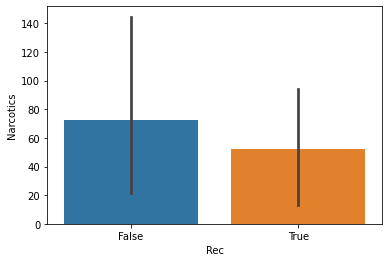

In [314]:
ax = sns.barplot(x="Rec", y="Narcotics", data=crime_change_df)

Here's a statistical test for whether the observed differences are statistically significant.

In [315]:
from scipy import stats

rec_dui_changes = crime_change_df.loc[crime_change_df['County'].isin(rec_counties_l),'DUI']
nonrec_dui_changes = crime_change_df.loc[crime_change_df['County'].isin(nonrec_counties_l),'DUI']

stats.ttest_ind(rec_dui_changes,nonrec_dui_changes,equal_var=False)

Ttest_indResult(statistic=-1.726338095357683, pvalue=0.09204893396282283)

In [316]:
rec_narcotics_changes = crime_change_df.loc[crime_change_df['County'].isin(rec_counties_l),'Narcotics']
nonrec_narcotics_changes = crime_change_df.loc[crime_change_df['County'].isin(nonrec_counties_l),'Narcotics']

stats.ttest_ind(rec_narcotics_changes,nonrec_narcotics_changes,equal_var=False)

Ttest_indResult(statistic=1.67509460525455, pvalue=0.10111130156419484)

## Discuss
Interpet the observed changes in crime statistics between 2013 and 2019 for legalizing and non-legalizing counties.

For legalizing counties non-legalizing counties between 2013 and 2019 the p values are high so we cannot reject the null hyphteisis. This means that the sales of recreational and non recreational marijuana have not been proven to change any arrests, whether or DUI or narcotics.

## Appendix

Here's the steps I took to collect and clean up some of the data used for this module. **There's nothing you need to run in here to complete any part of this assignment**, I just share it in the interests of transparency and supporting motivated learners. 

Libraries only needed for the appendix.

In [ ]:
import requests, os, re, time
from bs4 import BeautifulSoup
from urllib.parse import quote, unquote
from datetime import datetime
from io import BytesIO

### Sales reports
The Colorado Department of Revenue's [Manrijuana Sales Reports](https://revenue.colorado.gov/data-and-reports/marijuana-data/marijuana-sales-reports) stores Excel files on a Google Drive.

First, get all the links to each month's report by retrieving and parsing the markup from the website.

In [ ]:
# Get the raw HTML of the page
raw = requests.get('https://revenue.colorado.gov/data-and-reports/marijuana-data/marijuana-sales-reports')

# Turn into Soup
soup = BeautifulSoup(raw.text)

# Find the elements corresponding to the containers with the yearly data
containers = soup.find_all('dl',{'class':'ckeditor-accordion'})

Second, download all the Excel files. 

Confirm we got them all.

In [ ]:
sorted(excel_files.keys())

Define a function to parse the files.

In [ ]:
def clean_excel(_df):
    
    # Drop first 5 rows
    _df = _df.drop(index=range(5)).reset_index(drop=True)
    
    # Drop empty column
    _df = _df.dropna(how='all',axis=1)
    
    # Rename columns
    _df.columns = ['Med County','Med Sales','Rec County','Rec Sales']
    
    # Find row for last medical and recreational sales
    last_med = _df[_df['Med County'].str.contains('Sum of NR Counties').fillna(False)].first_valid_index() - 1
    last_rec = _df[_df['Rec County'].str.contains('Sum of NR Counties').fillna(False)].first_valid_index() - 1

    # Slice to only those values
    med_sales = _df.loc[:last_med,['Med County','Med Sales']]
    rec_sales = _df.loc[:last_rec,['Rec County','Rec Sales']]
    
    # Rename columns
    med_sales.columns = ['County','Sales']
    rec_sales.columns = ['County','Sales']

    # Add type
    med_sales['Type'] = 'Medical'
    rec_sales['Type'] = 'Recreational'
    
    # Concatenate
    combined_df = pd.concat([med_sales,rec_sales],ignore_index=True)
    combined_df = combined_df.replace({'Sales':{'NR':np.nan}})

    return combined_df

Loop through files, parse out relevant data, and concatenate results together.

In [ ]:
cleaned_dict = {}

# Apply the function to each month's spreadsheet
for _month, _df in excel_files.items():
    try:
        cleaned_dict[_month] = clean_excel(_df)
    except:
        print(_month)
        pass

# Combine all the months of data together
combined_df = pd.concat(cleaned_dict.values(),keys=cleaned_dict.keys())

# Cleanup
combined_df = combined_df.reset_index(0).reset_index(drop=True)
combined_df = combined_df.rename(columns={'level_0':'Time'})

combined_df = combined_df.sort_values(['Time','County','Type'])

# Write to disk
combined_df.to_csv('colorado_monthly_cannabis_sales.csv',index=False)

print(combined_df.shape)
combined_df.tail()

Old method using files I manually downloaded.

In [ ]:
_dir = 'E:/Dropbox/Courses/2020 Fall - INFO 3401/Code and data/cannabis_sales/'
files = [f for f in os.listdir(_dir) if '.xlsx' in f]

data_dict = {}
# filename_prefixes = [i.strftime('%m%y') for i in pd.period_range('2014-01','2020-10',freq='1M')]

_dir = 'E:/Dropbox/Courses/2020 Fall - INFO 3401/Code and data/cannabis_sales/'
files = [f for f in os.listdir(_dir) if '.xlsx' in f]

for month,df in files:
    try:
        period = pd.Period(datetime.strptime(f.split('_')[0],'%m%y'),freq='1M')
        data_dict[period] = pd.read_excel(_dir+f) #,skiprows=5)
    except:
        print(f)
        pass

print(len(data_dict))

### Crime

https://coloradocrimestats.state.co.us/public/View/

In [ ]:
co_dui_1719 = pd.read_csv('DUI Arrests 2017-2019.csv',skiprows=3).dropna(how='all',axis=1)
co_dui_1316 = pd.read_csv('DUI Arrests 2013-2016.csv',skiprows=3).dropna(how='all',axis=1)

co_dui_df = pd.concat([co_dui_1316,co_dui_1719],ignore_index=True)
co_dui_df['Incident Date'] = pd.to_datetime(co_dui_df['Incident Date'])
co_dui_df = co_dui_df.drop(columns=['Arrest Offense for A and B Arrests'])

co_dui_df = pd.pivot_table(data = co_dui_df,
                           columns = 'Jurisdiction by Geography',
                           index = 'Incident Date',
                           values = 'Number of Arrestees'
                          )

co_dui_df = co_dui_df.fillna(0)

co_dui_df = co_dui_df.groupby(pd.Grouper(freq='1M')).sum().stack().reset_index()
co_dui_df.columns = ['Time','County','Arrests']
co_dui_df['Time'] = co_dui_df['Time'].dt.to_period(freq='1M')

_rename = {c:c.replace(' County','') for c in co_dui_df['County'].unique().tolist() if 'County' in c}
co_dui_df = co_dui_df.replace({'County':_rename})

# co_dui_df.to_csv('co_county_dui.csv')

# co_dui_df.head()

In [ ]:
co_narcotics_1719 = pd.read_csv('Narcotics Arrests 2017-2019.csv',skiprows=3).dropna(how='all',axis=1)
co_narcotics_1316 = pd.read_csv('Narcotics Arrests 2013-2016.csv',skiprows=3).dropna(how='all',axis=1)

co_narcotics_df = pd.concat([co_narcotics_1316,co_narcotics_1719],ignore_index=True)
co_narcotics_df['Incident Date'] = pd.to_datetime(co_narcotics_df['Incident Date'])
co_narcotics_df = co_narcotics_df.drop(columns=['Arrest Offense for A and B Arrests'])

co_narcotics_df = pd.pivot_table(data = co_narcotics_df,
                           columns = 'Jurisdiction by Geography',
                           index = 'Incident Date',
                           values = 'Number of Arrestees'
                          )

co_narcotics_df = co_narcotics_df.fillna(0)

co_narcotics_df = co_narcotics_df.groupby(pd.Grouper(freq='1M')).sum().stack().reset_index()
co_narcotics_df.columns = ['Time','County','Arrests']
co_narcotics_df['Time'] = co_narcotics_df['Time'].dt.to_period(freq='1M')

_rename = {c:c.replace(' County','') for c in co_narcotics_df['County'].unique().tolist() if 'County' in c}
co_narcotics_df = co_narcotics_df.replace({'County':_rename})

# co_narcotics_df.to_csv('co_county_narcotics.csv')

# co_narcotics_df.head()

In [ ]:
co_county_crime_df = pd.concat([co_dui_df,co_narcotics_df],
                               keys=['DUI','Narcotics'],
                               names=['Type']
                              ).reset_index(0)
co_county_crime_df = co_county_crime_df[['Time','County','Type','Arrests']]

co_county_crime_df = co_county_crime_df.sort_values(['Time','County','Type']).reset_index(drop=True)

co_county_crime_df.to_csv('co_county_crime.csv',index=False)

co_county_crime_df.head()

In [ ]:
co_county_crime_df = pd.merge(left = co_dui_df,
                              right = co_narcotics_df,
                              how = 'outer',
                              left_on = ['Time','County'],
                              right_on = ['Time','County']
                             )

co_county_crime_df.to_csv('co_county_crime.csv',index=False)

co_county_crime_df.head()